In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visibility
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Loading data
# UnicodeDecodeError error with default encoding(UTF-8) as the file contains characters not valid in UTF-8, therefore I have forced encoding
df = pd.read_csv(r'C:\Users\prakh\OneDrive\Desktop\Jupyter\Task2.csv', encoding='latin-1')

# Convert REPAIR_DATE to datetime 
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'], errors='coerce')

df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,"8,872",0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,NaN,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,"16,346",0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,NaN,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,1,921083521,9,"8,887",0,0-0310,T00.0006,US,12,YF5,FF6,130,FREG,NaN,"2,457.45","3,205.45","1,012.67",EN0,NONE,MF1,NONE,NaN,NaN,NaN,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,NaN,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,"15,500",0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,NaN,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,NaN,"1,439.65","1,439.65",136,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [26]:
# Check Data Types and Missing Values
print("--- DataFrame Information ---")
df.info()

print("\n--- Descriptive Statistics for Key Numerical Columns ---")
print(df[['REPAIR_AGE', 'KM', 'TOTALCOST', 'LBRCOST']].describe())

# Summarize critical columns for the report
column_analysis = {
    'VIN': {'DataType': 'Object', 'Unique Values': df['VIN'].nunique(), 'Significance': 'Primary vehicle identifier. Critical for tracking individual vehicle history and repeat issues.'},
    'TRANSACTION_ID': {'DataType': 'Int64', 'Unique Values': df['TRANSACTION_ID'].nunique(), 'Significance': 'Claim procedure code. High cardinality suggests grouping of similar repairs.'},
    'CORRECTION_VERBATIM': {'DataType': 'Object', 'Unique Values': 'High (Free Text)', 'Significance': 'Technician’s fix description. Key source for root cause and repair action analysis.'},
    'CUSTOMER_VERBATIM': {'DataType': 'Object', 'Unique Values': 'High (Free Text)', 'Significance': 'Customer’s complaint. Vital for early warning systems and understanding failure symptomology.'},
    'KM': {'DataType': 'Int64', 'Unique Values': 'Continuous', 'Significance': 'Mileage at repair. Essential for analyzing failure rate as a function of vehicle usage.'},
    'PLATFORM': {'DataType': 'Object', 'Unique Values': df['PLATFORM'].nunique(), 'Significance': 'Vehicle architecture/model family. Critical for comparing quality performance across product lines.'},
    'CAUSAL_PART_NM': {'DataType': 'Object', 'Unique Values': df['CAUSAL_PART_NM'].nunique(), 'Significance': 'The defective component. Primary target for engineering investigation.'},
    'TOTALCOST': {'DataType': 'Float64', 'Unique Values': 'Continuous', 'Significance': 'Total claim cost. Key metric for financial impact analysis and prioritization.'},
}

print("\n--- Partial Column Analysis Table for Report ---")
print(pd.DataFrame.from_dict(column_analysis, orient='index'))

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object    

In [27]:
# --- 2a/2b. Handle Data Types and Missing Values ---

# STEP 1: Explicitly convert the columns to numeric FIRST.
# This is the line that fixes your current TypeError!
df['TOTALCOST'] = pd.to_numeric(df['TOTALCOST'], errors='coerce')
df['LBRCOST'] = pd.to_numeric(df['LBRCOST'], errors='coerce')
df['KM'] = pd.to_numeric(df['KM'], errors='coerce') 


# STEP 2: Handle missing/NaN values now that types are set.
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].fillna('UNKNOWN_PART')
df['CORRECTION_VERBATIM'] = df['CORRECTION_VERBATIM'].fillna('No correction text provided')
df['CUSTOMER_VERBATIM'] = df['CUSTOMER_VERBATIM'].fillna('No customer concern provided')

# Fill missing numeric values: 0 for cost, median for KM
df['TOTALCOST'] = df['TOTALCOST'].fillna(0)
df['LBRCOST'] = df['LBRCOST'].fillna(0)
df['KM'] = df['KM'].fillna(df['KM'].median())


# --- 2c. Address Inconsistencies (Categorical) ---
for col in ['PLATFORM', 'CAUSAL_PART_NM', 'BUILD_COUNTRY']:
    df[col] = df[col].astype(str).str.upper().str.strip() 

# --- 2d. Outlier Handling (KM) ---
Q1_km = df['KM'].quantile(0.25)
Q3_km = df['KM'].quantile(0.75)
IQR_km = Q3_km - Q1_km
upper_bound_km = Q3_km + 1.5 * IQR_km
df['KM_CLEANED'] = df['KM'].clip(upper=upper_bound_km)

print("Data cleaning is complete.")

Data cleaning is complete.


C:\Users\prakh\AppData\Local\Temp\ipykernel_19076\2269762512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='viridis')


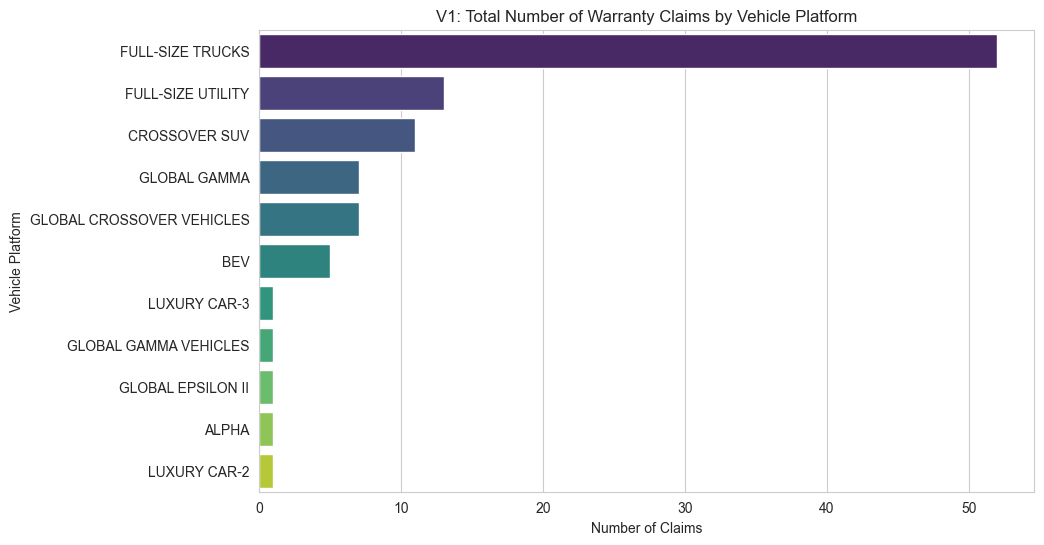

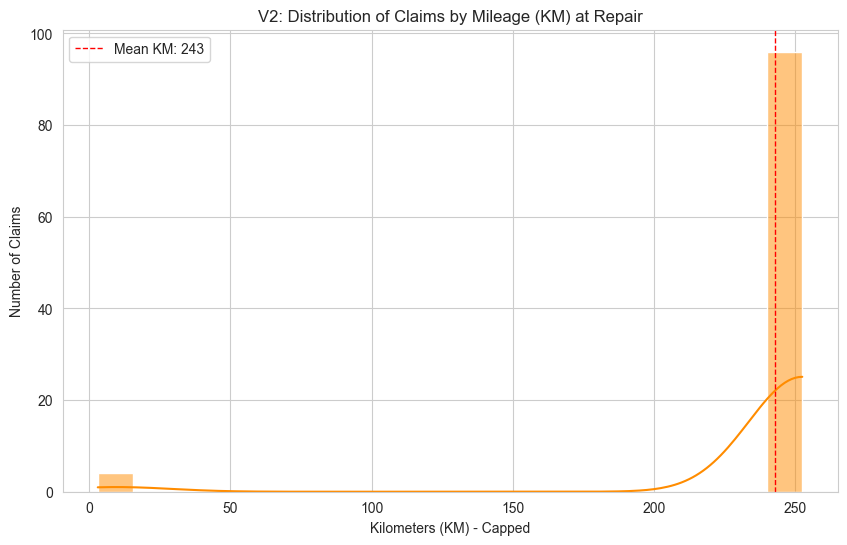

C:\Users\prakh\AppData\Local\Temp\ipykernel_19076\2269762512.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cost_parts.values, y=top_cost_parts.index, palette='magma')


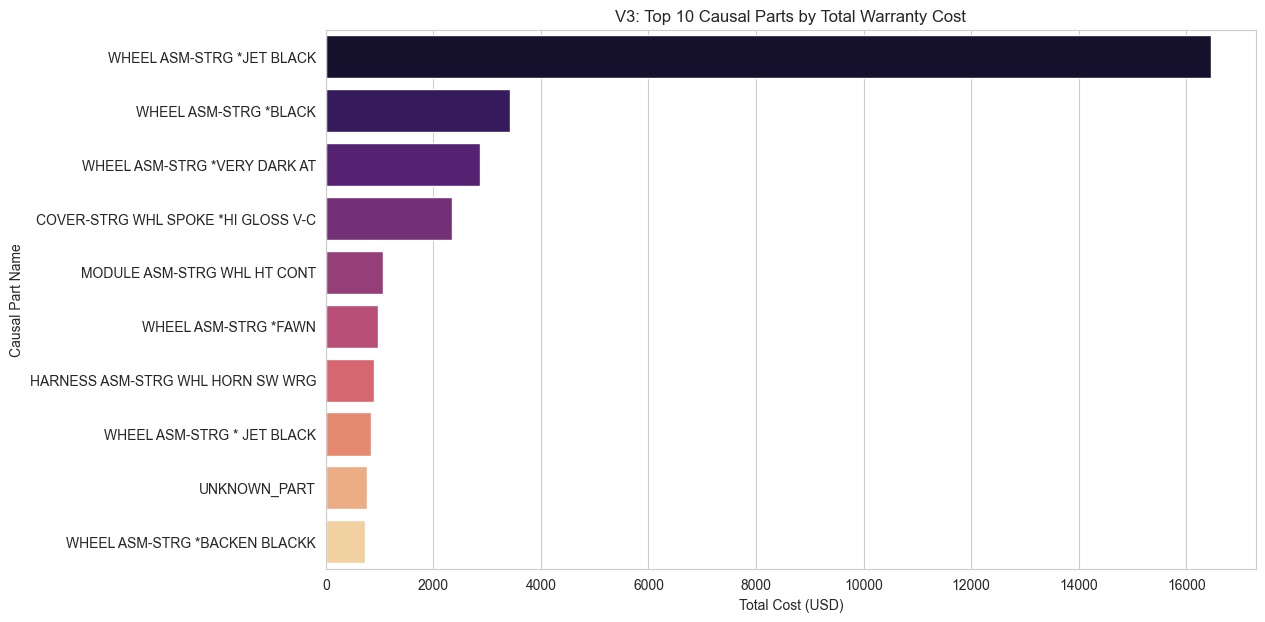

In [ ]:
# V1: Distribution of Claims by PLATFORM
plt.figure(figsize=(10, 6))
platform_counts = df['PLATFORM'].value_counts()
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='viridis')
plt.title('V1: Total Number of Warranty Claims by Vehicle Platform')
plt.xlabel('Number of Claims')
plt.ylabel('Vehicle Platform')
plt.show()

# 2: Distribution of Claims by Mileage (Usage/Continuous)
plt.figure(figsize=(10, 6))
sns.histplot(df['KM_CLEANED'], bins=20, kde=True, color='darkorange')
plt.title('V2: Distribution of Claims by Mileage (KM) at Repair')
plt.xlabel('Kilometers (KM) - Capped')
plt.ylabel('Number of Claims')
plt.axvline(df['KM_CLEANED'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean KM: {df["KM_CLEANED"].mean():.0f}')
plt.legend()
plt.show()

# V3: Top 10 Causal Parts by TOTALCOST
top_cost_parts = df.groupby('CAUSAL_PART_NM')['TOTALCOST'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_cost_parts.values, y=top_cost_parts.index, palette='magma')
plt.title('V3: Top 10 Causal Parts by Total Warranty Cost')
plt.xlabel('Total Cost (USD)')
plt.ylabel('Causal Part Name')
plt.show()

In [29]:
# --- Tagging Failure Condition (Symptom_Condition) ---
df['Symptom_Condition_Tag'] = 'Other'
df.loc[df['CUSTOMER_VERBATIM'].str.contains('HEAT|WARM|COLD|INOP|NOT WORKING|TURN OFF|FAILED', case=False, na=False), 'Symptom_Condition_Tag'] = 'Heater Malfunction'
df.loc[df['CUSTOMER_VERBATIM'].str.contains('PEELING|COMING APART|BUBBLING|LOOSE|FRAYING|STITCHING|LEATHER|TRIM|COVER|BEZEL', case=False, na=False), 'Symptom_Condition_Tag'] = 'Material Degradation/Fit'
df.loc[df['CUSTOMER_VERBATIM'].str.contains('NOISE|CLICKING|RUBBING', case=False, na=False), 'Symptom_Condition_Tag'] = 'Noise/Mechanical'
df.loc[df['CUSTOMER_VERBATIM'].str.contains('SUPER CRUISE|DRIVER ASSIST|MESSAGE|OFF CENTRE', case=False, na=False), 'Symptom_Condition_Tag'] = 'Driver Assist/Alignment'

# --- Tagging Component (Symptom_Component) ---
df['Symptom_Component_Tag'] = 'Other'
df.loc[df['CUSTOMER_VERBATIM'].str.contains('WHEEL|STRG|STEERING', case=False, na=False), 'Symptom_Component_Tag'] = 'Steering Wheel'
df.loc[df['CUSTOMER_VERBATIM'].str.contains('MODULE|S-W MODULE', case=False, na=False), 'Symptom_Component_Tag'] = 'Steering Wheel Module'
df.loc[df['CUSTOMER_VERBATIM'].str.contains('HORN|SWIT', case=False, na=False), 'Symptom_Component_Tag'] = 'Horn/Switch'

# --- Bonus Tag: Repair Action Type (from CORRECTION_VERBATIM) ---
df['Repair_Action_Tag'] = 'Other'
df.loc[df['CORRECTION_VERBATIM'].str.contains('REPLACED|REPLACE|INSTALLED|NEW', case=False, na=False), 'Repair_Action_Tag'] = 'Replacement'
df.loc[df['CORRECTION_VERBATIM'].str.contains('ADJUSTED|RECONNECTED|ALIGNED|REPAIRED|REASSEMBLED', case=False, na=False), 'Repair_Action_Tag'] = 'Adjustment/Repair'
df.loc[df['CORRECTION_VERBATIM'].str.contains('DIAGNOSE|TESTED|CHECKED', case=False, na=False) & ~df['CORRECTION_VERBATIM'].str.contains('REPLACED', case=False, na=False), 'Repair_Action_Tag'] = 'Diagnosis Only'

# Display Tag Distribution
print("\nTop 5 Failure Condition Tags:")
print(df['Symptom_Condition_Tag'].value_counts().head())

print("\nTop 5 Symptom Component Tags:")
print(df['Symptom_Component_Tag'].value_counts().head())


Top 5 Failure Condition Tags:
Symptom_Condition_Tag
Material Degradation/Fit    43
Heater Malfunction          26
Other                       19
Driver Assist/Alignment      8
Noise/Mechanical             4
Name: count, dtype: int64

Top 5 Symptom Component Tags:
Symptom_Component_Tag
Steering Wheel           85
Other                    10
Horn/Switch               4
Steering Wheel Module     1
Name: count, dtype: int64


In [31]:

df.to_csv('Task2_CSVclean', index=False, encoding='utf-8')